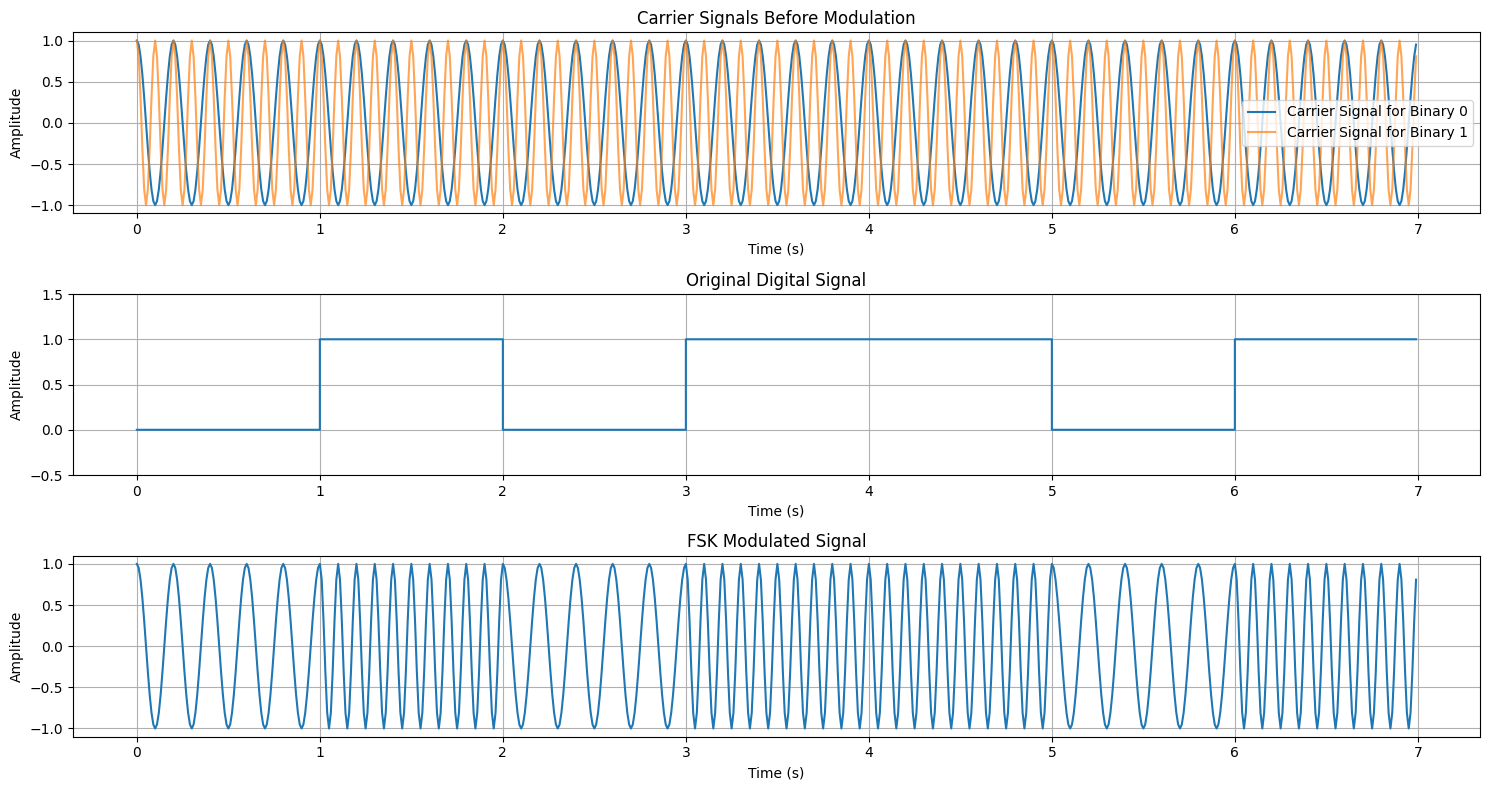

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters
bit_rate = 1  # Bits per second
carrier_frequency_0 = 5  # Hz, carrier frequency for binary 0
carrier_frequency_1 = 10  # Hz, carrier frequency for binary 1
sampling_rate = 100  # Hz, should be significantly higher than the carrier frequency
duration = 1 / bit_rate  # Seconds, duration of one bit

# Binary data to modulate
data = np.array([0, 1, 0, 1, 1, 0, 1])

# Generating time vector for one bit
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
# Extended time vector for the entire data
time_vector = np.linspace(0, len(data) * duration, int(sampling_rate * duration * len(data)), endpoint=False)

# Generating carrier signals for one period
carrier_signal_0 = np.cos(2 * np.pi * carrier_frequency_0 * t)
carrier_signal_1 = np.cos(2 * np.pi * carrier_frequency_1 * t)

# Extended carrier signals for visualization
extended_carrier_signal_0 = np.tile(carrier_signal_0, len(data))
extended_carrier_signal_1 = np.tile(carrier_signal_1, len(data))

# Digital signal (original binary data repeated for the duration of one bit)
digital_signal = np.repeat(data, int(sampling_rate * duration))

# FSK modulation
modulated_signal = np.zeros(len(time_vector))
for i, bit in enumerate(data):
    if bit == 0:
        modulated_signal[i * len(t):(i+1) * len(t)] = carrier_signal_0
    else:
        modulated_signal[i * len(t):(i+1) * len(t)] = carrier_signal_1

# Plotting
plt.figure(figsize=(15, 8))

# Plot carrier signals before modulation
plt.subplot(3, 1, 1)
plt.plot(time_vector, extended_carrier_signal_0, label='Carrier Signal for Binary 0')
plt.plot(time_vector, extended_carrier_signal_1, label='Carrier Signal for Binary 1', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier Signals Before Modulation')
plt.legend()
plt.grid(True)

# Plot original digital signal
plt.subplot(3, 1, 2)
plt.plot(time_vector, digital_signal, drawstyle='steps-post', label='Original Digital Signal')
plt.ylim(-0.5, 1.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Digital Signal')
plt.grid(True)

# Plot FSK modulated signal
plt.subplot(3, 1, 3)
plt.plot(time_vector, modulated_signal, label='FSK Modulated Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('FSK Modulated Signal')
plt.grid(True)

plt.tight_layout()
plt.show()
